In [2]:
!cp drive/My\ Drive/natural-language-processing/Comments_Data.zip .
!unzip Comments_Data.zip
!cp drive/My\ Drive/natural-language-processing/stopwords-farsi.txt .

Archive:  Comments_Data.zip
  inflating: test_nolabel_comments.csv  
  inflating: train_comments.csv      


### Loading Data
- I am going to read only 10000 rows because of low ram issues

In [3]:
import pandas as pd
pd.options.display.max_colwidth = 100

In [10]:
df = pd.read_csv('train_comments.csv', index_col='id', usecols=['id','title','comment','verification_status'],nrows=20000)
df.head()

,title,comment,verification_status
id,,,
0,نسبت به قیمتش خوبه ولی یه کم کوچیکه,کوچیکه - کلید خاموش و روشنش مسخره اس,1
1,شومیز,خیلی بد فرمه انگار مانتوی بارداریه. اصلا با عکسی که گذاشتن مطابقت نداره,0
2,جنس بسیار ضعیفه,پیشنهادم اینه ک کسی نخره چون پولشو میندازه دور,0
3,رضایت از خرید,طعمش از بقیه کاپوچینو های فوری بهتره,0
4,ارسال جنس تقلبی,برای من چهار عدد ارسال شد که یکی از کارتن ها باز شده بود و شمع تقلبی داخلش گذاشته بودن و با چسب ...,1


In [11]:
df.describe()

,verification_status
count,20000.000000
mean,0.166650
std,0.372672
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Checking for null values

In [55]:
df.isnull().sum()

title                  0
comment                0
verification_status    0
dtype: int64

### Data Cleaning
- Make text all lower case (Normalization)
- Punctuation Removal
- Numerical Value Removal
- Stop-words Removal
- Tokenization

In [12]:
df.comment.loc[0]

'کوچیکه - کلید خاموش و روشنش مسخره اس'

In [13]:
import re
import string

def clean_text(text):
  text = text.lower()
  text = re.sub('[.*؟،?\/]', '', text)  # remove .*?
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
  text = re.sub('\w*\d\w*', '', text) # remove any number surrounded with a string
  return text

df.comment = df.comment.apply(lambda x: clean_text(x))
df.head(5)

,title,comment,verification_status
id,,,
0,نسبت به قیمتش خوبه ولی یه کم کوچیکه,کوچیکه کلید خاموش و روشنش مسخره اس,1
1,شومیز,خیلی بد فرمه انگار مانتوی بارداریه اصلا با عکسی که گذاشتن مطابقت نداره,0
2,جنس بسیار ضعیفه,پیشنهادم اینه ک کسی نخره چون پولشو میندازه دور,0
3,رضایت از خرید,طعمش از بقیه کاپوچینو های فوری بهتره,0
4,ارسال جنس تقلبی,برای من چهار عدد ارسال شد که یکی از کارتن ها باز شده بود و شمع تقلبی داخلش گذاشته بودن و با چسب ...,1


### More Data Cleaning

In [14]:
def clean_text_more(text):
  text = re.sub('[''""...]', '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\r', '', text)
  text = re.sub('[...]','',text).replace('\u200c', '')
  return text

df.comment = df.comment.apply(lambda x: clean_text_more(x))
df['comment'].head(50)

id
0                                                                     کوچیکه  کلید خاموش و روشنش مسخره اس
1                                  خیلی بد فرمه انگار مانتوی بارداریه اصلا با عکسی که گذاشتن مطابقت نداره
2                                                          پیشنهادم اینه ک کسی نخره چون پولشو میندازه دور
3                                                                    طعمش از بقیه کاپوچینو های فوری بهتره
4     برای من چهار عدد ارسال شد که یکی از کارتن ها باز شده بود و شمع تقلبی داخلش گذاشته بودن و با چسب ...
5     به نظر من نباید عکس  با خود جنس مقایرت داشته باشه  میشه هم طوری عکاسی بکنید که  به اشتباه نیفتند...
6     بیش از  ماه پیش  این سیستم را با توجه به نضرات کاربران برای بچه ها که در سالهای آخر دبیرستان هست...
7         میشه سایز  رو دوباره موجود کنیدمن دیر رسیدم به پیشنهاد شگفت انگیزشکاش دوباره شگفت انگیز بزاریدش
8                                                                                               راضی بودم
9                                          

In [15]:
re.sub('[...]','','من این ساعت رو خریداری کردم و بعد از تحویل در کمال شگفتی متوجه شدم که روی جعبه مشخصات ساعت دیگه ای نوشته شده که با ساعتی که ...').replace('\u200c', '')


'من این ساعت رو خریداری کردم و بعد از تحویل در کمال شگفتی متوجه شدم که روی جعبه مشخصات ساعت دیگه ای نوشته شده که با ساعتی که '

### Organizing the data
- Corpus which is already ready
- Document-Term matrix

In [16]:
df.to_pickle('corpus.pkl')

#### Document-Term Matrix

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.externals import joblib ## can use joblib for better performance

### Set a custom persian stop words
stop_words = open('stopwords-farsi.txt').readlines()
stop_words_to_list = [word.strip() for word in stop_words]

cv = TfidfVectorizer(stop_words=stop_words_to_list)
# vec.fit(df.comment)
# joblib.dump(vec, 'vec_count.joblib')
# vec = joblib.load('vec_count.joblib')
# df_cv = vec.transform(df.comment)
df_cv = cv.fit_transform(df.comment)
df_dtm = pd.DataFrame(df_cv.toarray(),columns=cv.get_feature_names())
df_dtm.index = df.index
df_dtm.tail()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aali,abs,absebd,ac,accell,acer,acmواقعا,action,actyon,adata,adataتا,adsl,after,air,airdots,airdotspro,aks,al,ali,alt,ama,amd,amoled,anc,and,anker,antutu,aqva,ar,arc,armor,aspire,asus,atmos,audio,auto,aux,av,...,یکسوم,یکش,یکطرفش,یکطرفه,یکم,یکماه,یکماهه,یکماهی,یکمتو,یکمرتبه,یکمش,یکمقدار,یکمم,یکمواسه,یکمی,یکمیل,یکمین,یکنم,یکنواخت,یکنواخته,یکنواختی,یکنی,یکه,یکهبا,یکهفته,یکو,یکپارچه,یککشو,یککیسه,یکگ,یکیش,یکیشم,یکیشو,یکیشون,یکیه,یکیو,یکیک,یگیش,یی,یییییییییییییییییییر
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Exploratory Data Analysis

#### How comments are distributed

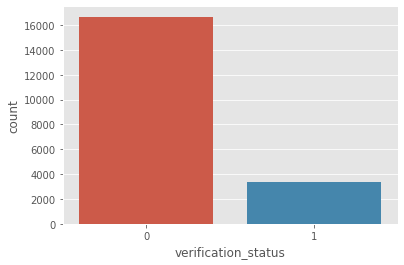

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np

plt.style.use('ggplot')


sns.countplot(data= df, x = 'verification_status');


###Lets perform EDA for the verified comments


In [36]:
!pip install persian_wordcloud

     |████████████████████████████████| 71kB 2.3MB/s 
  Created wheel for persian-wordcloud: filename=persian_wordcloud-1.3.1-cp36-none-any.whl size=65942 sha256=605eea6c8839343d494b2654b463a3962741b937cc30464c54bcbab221d37916
  Stored in directory: /root/.cache/pip/wheels/d6/cb/3e/9cbd2b569d53b1442208fa3a4c66c2fc2bd6ade54231d08549
  Created wheel for arabic-reshaper: filename=arabic_reshaper-2.1.0-cp36-none-any.whl size=16501 sha256=01c676b3483fc821e8a452bc0905da0e34042abdb06920c4e43c4fff6ef3a4a6
  Stored in directory: /root/.cache/pip/wheels/a9/e6/ec/2ba48138d4447d40442dd6ba3bf6b92d9c6afd74e9c720c6fe
Successfully built persian-wordcloud arabic-reshaper


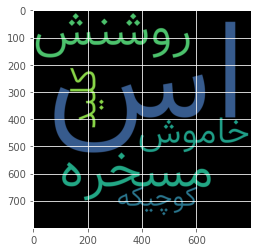

In [45]:
from persian_wordcloud.wordcloud import PersianWordCloud


df_verified = df[df.verification_status ==1]
df_verified.head()

k= df_verified['comment'].any()



# Generate a word cloud image
wordcloud = PersianWordCloud(
    only_persian=True,
    max_words=200,
    stopwords=stop_words_to_list,
    margin=0,
    width=800,
    height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(k)

image = wordcloud.to_image()
plt.imshow(image)


###Lets perform EDA for the unverified comments

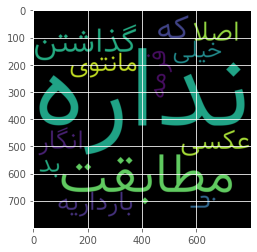

In [44]:
df_unverified = df[df.verification_status ==0]
df_unverified.head()

k= df_unverified['comment'].any()



# Generate a word cloud image
wordcloud = PersianWordCloud(
    only_persian=True,
    max_words=200,
    stopwords=stop_words_to_list,
    margin=0,
    width=800,
    height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(k)

image = wordcloud.to_image()
plt.imshow(image)
